# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b   -1.120615
c   -4.235415
d   -0.235699
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2019'
date = '19/11/2019 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2019 14:45:00
DatetimeIndex(['2019-11-19 14:45:00', '2019-11-20 14:45:00',
               '2019-11-21 14:45:00', '2019-11-22 14:45:00',
               '2019-11-23 14:45:00', '2019-11-24 14:45:00',
               '2019-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2019-11-19 14:45:00', '2019-11-19 14:45:01',
               '2019-11-19 14:45:02', '2019-11-19 14:45:03',
               '2019-11-19 14:45:04', '2019-11-19 14:45:05',
               '2019-11-19 14:45:06', '2019-11-19 14:45:07',
               '2019-11-19 14:45:08', '2019-11-19 14:45:09',
               ...
               '2019-11-19 15:44:50', '2019-11-19 15:44:51',
               '2019-11-19 15:44:52', '2019-11-19 15:44:53',
               '2019-11-19 15:44:54', '2019-11-19 15:44:55',
               '2019-11-19 15:44:56', '2019-11-19 15:44:57',
               '2019-11-19 15:44:58', '2019-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [13]:
tstamp = pd.Timestamp(dt.datetime(2019, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1574121600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [15]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2019-11-19 14:45:00     9.682456
2019-11-20 14:45:00    10.595396
2019-11-21 14:45:00     9.666798
2019-11-22 14:45:00    10.181908
Freq: D, dtype: float64 

Series([], Freq: D, dtype: float64) 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [16]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [17]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,-1.556792,-0.545761,-0.150988,-1.233492
2018-11-19 15:45:00,-0.157271,0.869741,-1.138529,0.067958
2018-11-19 16:45:00,2.607444,0.455125,-0.313257,-0.203130
2018-11-19 17:45:00,1.475013,0.117223,0.447630,1.466839
2018-11-19 18:45:00,-0.566478,-1.423130,-1.526628,-1.316082
2018-11-19 19:45:00,-0.381283,0.498645,0.496891,-1.187808
2018-11-19 20:45:00,0.446915,-0.003119,0.831505,-0.735448
2018-11-19 21:45:00,-1.900341,0.263457,-0.761536,-0.020679
2018-11-19 22:45:00,-0.922073,-0.637120,-0.177137,0.126522
2018-11-19 23:45:00,0.954173,-0.562154,-1.065822,-0.862335


or by means of a dictionary:


In [19]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [20]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [21]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-1.556792,-0.545761,-0.150988,-1.233492
2018-11-19 15:45:00,-0.157271,0.869741,-1.138529,0.067958
2018-11-19 16:45:00,2.607444,0.455125,-0.313257,-0.203130
2018-11-19 17:45:00,1.475013,0.117223,0.447630,1.466839
2018-11-19 18:45:00,-0.566478,-1.423130,-1.526628,-1.316082


In [22]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,0.446915,-0.003119,0.831505,-0.735448
2018-11-19 21:45:00,-1.900341,0.263457,-0.761536,-0.020679
2018-11-19 22:45:00,-0.922073,-0.637120,-0.177137,0.126522
2018-11-19 23:45:00,0.954173,-0.562154,-1.065822,-0.862335


In [23]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [25]:
df.values

array([[-1.55679215, -0.54576126, -0.15098766, -1.23349219],
       [-0.15727124,  0.86974053, -1.13852852,  0.06795797],
       [ 2.6074442 ,  0.45512481, -0.31325672, -0.20313018],
       [ 1.47501311,  0.11722346,  0.44763009,  1.46683889],
       [-0.56647763, -1.42312981, -1.52662765, -1.31608175],
       [-0.38128256,  0.49864513,  0.49689141, -1.18780782],
       [ 0.44691505, -0.00311903,  0.83150515, -0.73544792],
       [-1.90034053,  0.26345694, -0.76153594, -0.0206787 ],
       [-0.92207309, -0.63712038, -0.17713688,  0.12652243],
       [ 0.95417263, -0.56215448, -1.06582164, -0.86233502]])

In [26]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.000069,-0.096709,-0.335787,-0.389765
std,1.392868,0.686939,0.782177,0.859181
min,-1.900341,-1.423130,-1.526628,-1.316082
25%,-0.833174,-0.558056,-0.989750,-1.106440
50%,-0.269277,0.057052,-0.245197,-0.469289
75%,0.827358,0.407208,0.297976,0.045799
max,2.607444,0.869741,0.831505,1.466839


In [27]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-1.556792,-0.157271,2.607444,1.475013,-0.566478,-0.381283,0.446915,-1.900341,-0.922073,0.954173
B,-0.545761,0.869741,0.455125,0.117223,-1.423130,0.498645,-0.003119,0.263457,-0.637120,-0.562154
C,-0.150988,-1.138529,-0.313257,0.447630,-1.526628,0.496891,0.831505,-0.761536,-0.177137,-1.065822
D,-1.233492,0.067958,-0.203130,1.466839,-1.316082,-1.187808,-0.735448,-0.020679,0.126522,-0.862335


In [28]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,-1.233492,-0.150988,-0.545761,-1.556792
2018-11-19 15:45:00,0.067958,-1.138529,0.869741,-0.157271
2018-11-19 16:45:00,-0.203130,-0.313257,0.455125,2.607444
2018-11-19 17:45:00,1.466839,0.447630,0.117223,1.475013
2018-11-19 18:45:00,-1.316082,-1.526628,-1.423130,-0.566478
2018-11-19 19:45:00,-1.187808,0.496891,0.498645,-0.381283
2018-11-19 20:45:00,-0.735448,0.831505,-0.003119,0.446915
2018-11-19 21:45:00,-0.020679,-0.761536,0.263457,-1.900341
2018-11-19 22:45:00,0.126522,-0.177137,-0.637120,-0.922073
2018-11-19 23:45:00,-0.862335,-1.065822,-0.562154,0.954173


In [29]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 18:45:00,-0.566478,-1.423130,-1.526628,-1.316082
2018-11-19 15:45:00,-0.157271,0.869741,-1.138529,0.067958
2018-11-19 23:45:00,0.954173,-0.562154,-1.065822,-0.862335
2018-11-19 21:45:00,-1.900341,0.263457,-0.761536,-0.020679
2018-11-19 16:45:00,2.607444,0.455125,-0.313257,-0.203130
2018-11-19 22:45:00,-0.922073,-0.637120,-0.177137,0.126522
2018-11-19 14:45:00,-1.556792,-0.545761,-0.150988,-1.233492
2018-11-19 17:45:00,1.475013,0.117223,0.447630,1.466839
2018-11-19 19:45:00,-0.381283,0.498645,0.496891,-1.187808
2018-11-19 20:45:00,0.446915,-0.003119,0.831505,-0.735448


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [30]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -1.556792
2018-11-19 15:45:00   -0.157271
2018-11-19 16:45:00    2.607444
2018-11-19 17:45:00    1.475013
2018-11-19 18:45:00   -0.566478
2018-11-19 19:45:00   -0.381283
2018-11-19 20:45:00    0.446915
2018-11-19 21:45:00   -1.900341
2018-11-19 22:45:00   -0.922073
2018-11-19 23:45:00    0.954173
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -1.556792
2018-11-19 15:45:00   -0.157271
2018-11-19 16:45:00    2.607444
2018-11-19 17:45:00    1.475013
2018-11-19 18:45:00   -0.566478
2018-11-19 19:45:00   -0.381283
2018-11-19 20:45:00    0.446915
2018-11-19 21:45:00   -1.900341
2018-11-19 22:45:00   -0.922073
2018-11-19 23:45:00    0.954173
Freq: H, Name: A, dtype: float64


In [31]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00 -1.556792 -0.545761 -0.150988 -1.233492
2018-11-19 15:45:00 -0.157271  0.869741 -1.138529  0.067958
2018-11-19 16:45:00  2.607444  0.455125 -0.313257 -0.203130
                            A         B         C         D
2018-11-19 14:45:00 -1.556792 -0.545761 -0.150988 -1.233492
2018-11-19 15:45:00 -0.157271  0.869741 -1.138529  0.067958
2018-11-19 16:45:00  2.607444  0.455125 -0.313257 -0.203130


### Selection by label

In [ ]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

In [ ]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

In [ ]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

In [ ]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

### Selecting by position

In [ ]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

In [ ]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

In [ ]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


In [ ]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 15:45:00,-0.157271,0.869741,-1.138529,0.067958
2018-11-19 16:45:00,2.607444,0.455125,-0.313257,-0.203130
2018-11-19 17:45:00,1.475013,0.117223,0.447630,1.466839
2018-11-19 19:45:00,-0.381283,0.498645,0.496891,-1.187808
2018-11-19 21:45:00,-1.900341,0.263457,-0.761536,-0.020679


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,NaN,NaN,NaN
2018-11-19 15:45:00,NaN,0.869741,NaN,0.067958
2018-11-19 16:45:00,2.607444,0.455125,NaN,NaN
2018-11-19 17:45:00,1.475013,0.117223,0.447630,1.466839
2018-11-19 18:45:00,NaN,NaN,NaN,NaN
2018-11-19 19:45:00,NaN,0.498645,0.496891,NaN
2018-11-19 20:45:00,0.446915,NaN,0.831505,NaN
2018-11-19 21:45:00,NaN,0.263457,NaN,NaN
2018-11-19 22:45:00,NaN,NaN,NaN,0.126522
2018-11-19 23:45:00,0.954173,NaN,NaN,NaN


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.545761,-0.150988,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.157271,0.869741,-1.138529,5,0.5,2,0.999962
2018-11-19 16:45:00,2.607444,0.455125,-0.313257,5,1.0,4,0.999848
2018-11-19 17:45:00,1.475013,0.117223,0.447630,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.566478,-1.423130,-1.526628,5,2.0,8,0.999391
2018-11-19 19:45:00,-0.381283,0.498645,0.496891,5,2.5,10,0.999048
2018-11-19 20:45:00,0.446915,-0.003119,0.831505,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.900341,0.263457,-0.761536,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.922073,-0.637120,-0.177137,5,4.0,16,0.997564
2018-11-19 23:45:00,0.954173,-0.562154,-1.065822,5,4.5,18,0.996917


In [ ]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,-0.545761,-0.150988,5,0.0,1.000000
2018-11-19 15:45:00,-0.157271,0.869741,-1.138529,5,0.5,0.999962
2018-11-19 16:45:00,2.607444,0.455125,-0.313257,5,1.0,0.999848
2018-11-19 17:45:00,1.475013,0.117223,0.447630,5,1.5,0.999657
2018-11-19 18:45:00,-0.566478,-1.423130,-1.526628,5,2.0,0.999391
2018-11-19 19:45:00,-0.381283,0.498645,0.496891,5,2.5,0.999048
2018-11-19 20:45:00,0.446915,-0.003119,0.831505,5,3.0,0.998630
2018-11-19 21:45:00,-1.900341,0.263457,-0.761536,5,3.5,0.998135
2018-11-19 22:45:00,-0.922073,-0.637120,-0.177137,5,4.0,0.997564
2018-11-19 23:45:00,0.954173,-0.562154,-1.065822,5,4.5,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.545761,-0.150988,5,0.0,0,1.000000
2018-11-19 19:45:00,-0.381283,0.498645,0.496891,5,2.5,10,0.999048
2018-11-19 20:45:00,0.446915,-0.003119,0.831505,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.900341,0.263457,-0.761536,5,3.5,14,0.998135
2018-11-19 22:45:00,-0.922073,-0.637120,-0.177137,5,4.0,16,0.997564
2018-11-19 23:45:00,0.954173,-0.562154,-1.065822,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.545761,-0.150988,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.157271,0.869741,-1.138529,5,0.5,2,0.999962
2018-11-19 16:45:00,2.607444,0.455125,-0.313257,5,1.0,4,0.999848
2018-11-19 17:45:00,1.475013,0.117223,0.447630,5,1.5,6,0.999657
2018-11-19 18:45:00,-0.566478,-1.423130,-1.526628,5,2.0,8,0.999391
2018-11-19 19:45:00,-0.381283,0.498645,0.496891,5,2.5,10,0.999048
2018-11-19 20:45:00,0.446915,-0.003119,0.831505,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.900341,0.263457,-0.761536,5,3.5,14,0.998135
2018-11-19 23:45:00,0.954173,-0.562154,-1.065822,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,0.869741,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,2.607444,0.455125,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,1.475013,0.117223,0.447630,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,NaN,NaN,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,0.498645,0.496891,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.446915,NaN,0.831505,5,3.0,12.0,0.998630
2018-11-19 21:45:00,NaN,0.263457,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,NaN,NaN,NaN,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.954173,NaN,NaN,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2018-11-19 17:45:00,1.475013,0.117223,0.44763,5,1.5,6.0,0.999657


In [ ]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [ ]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

In [ ]:
# global operations on columns
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [41]:
file_name="/Users/mzanetti/data/LEMMA2018/DT/raw/data_000636.txt"
data=pd.read_csv(file_name)
data

FileNotFoundError: File b'/Users/mzanetti/data/LEMMA2018/DT/raw/data_000636.txt' does not exist

Let's now do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [ ]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

In [ ]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

In [ ]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

In [ ]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [ ]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

In [ ]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [44]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.859593
       two       0.630153
baz    one       0.208446
       two       0.892581
foo    one       0.609589
       two       0.901266
qux    one      -1.174542
       two      -2.579952
dtype: float64


In [ ]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

In [42]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

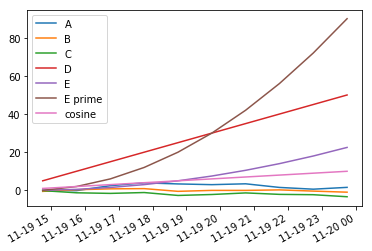

In [43]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')